# Day 6: Data Science and Growth of Functions
--------------------------------------------

## Reflections from Last Day

- Python objects and classes
```python
# Class definition
class Person:
    # Constructor (initializing attributes)
    def __init__(self, name, age):
        self.name = name   # Attribute: name
        self.age = age     # Attribute: age
    
    # Method to greet
    def greet(self):
        return f"Hello, my name is {self.name} and I am {self.age} years old."

person1 = Person("Alice", 30)
print(person1.greet())
```
- Python Libraries
    - pip install numpy
    - `import numpy as np`
    - dir(np)
- Data Science Using Pandas
    - `df = pd.read_csv(url)`
    - `df.shape, df.head(10)`
    - Principles: Specificity, Measurability, Relevance, Actionability

## Exercises from Last Day

- Create a figure with two subplots.
    - First subplot plots $y = sin(x)$ and $y = cos(x)$  from $x = 0 to 2*\pi$ on the same plot
    - Second subplot plots $y = tan(x)$ with y axis limits so y axis is between -10 and 10

## Agenda for Today

- More Data Science

- Growth of Functions

## More Data Science

### Learning Objectives

By the end of today's session, you will have learned to:
- Manipulate dataframes to find answers to your data questions
- Select a column from a dataset
- Filter data based on some conditions
- Sort a dataset based on the values of some columns
- Group and aggregate data to calculate summary statistics for each group
- Generate plots to visualize your data

### Questions to Guide Learning Objectives


1. What were the **top 10** migration routes in the world in each of **1960, 1970, 1980, 1990, and 2000**?

2. What were the **top 10** migration routes ending in an African country in each of **1960, 1970, 1980, 1990, and 2000?**

3. What are the **top 5** countries that Nigerians migrated to in 2000?

4. Ghana-Must-Go. **Investigate** this phenomenon by plotting a **line graph** showing Nigeria-to-Ghana and Ghana-to-Nigeria migrations from 1960 to 2000. Then compare your results with the story in this [article](https://atavist.mg.co.za/ghana-must-go-the-ugly-history-of-africas-most-famous-bag/).


#### Load Data


In [2]:
#### Load data
import pandas as pd
url = 'https://raw.githubusercontent.com/naijacoderorg/lectures/main/lectures2024/datascience/migrations.csv'
df = pd.read_csv(url)
df

,origin_country,origin_country_code,origin_continent,dest_country,dest_country_code,dest_continent,1960,1970,1980,1990,2000
0,Afghanistan,AFG,Asia,Afghanistan,AFG,Asia,0,0,0,0,0
1,Afghanistan,AFG,Asia,Albania,ALB,Europe,0,0,0,0,0
2,Afghanistan,AFG,Asia,Algeria,DZA,Africa,41,16,13,10,8
3,Afghanistan,AFG,Asia,American Samoa,ASM,Oceania,0,0,0,0,0
4,Afghanistan,AFG,Asia,Andorra,AND,Europe,0,0,2,5,6
...,...,...,...,...,...,...,...,...,...,...,...
51071,Zimbabwe,ZWE,Africa,Wallis and Futuna,WLF,Oceania,0,0,0,0,0
51072,Zimbabwe,ZWE,Africa,West Bank and Gaza,PSE,Asia,0,0,0,0,0
51073,Zimbabwe,ZWE,Africa,"Yemen, Rep.",YEM,Asia,0,0,0,0,0
51074,Zimbabwe,ZWE,Africa,Zambia,ZMB,Africa,90416,72452,49691,34855,31538


### Concepts

To prepare us to answer our data questions, we will learn some important concepts.

_Note: `df` is our input dataset. We will use more descriptive names for any new datasets we create._

#### Selecting columns

To select columns in a DataFrame, we pass a list of column names enclosed within square brackets after the DataFrame name. Since a list is also created using square brackets, this results in double square brackets.

In [4]:
# single column
df[['dest_country']] # select a single column

,dest_country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
51071,Wallis and Futuna
51072,West Bank and Gaza
51073,"Yemen, Rep."
51074,Zambia


In [6]:
# multiple columns
df[['origin_country', 'dest_country']] # select multiple columns

,origin_country,dest_country
0,Afghanistan,Afghanistan
1,Afghanistan,Albania
2,Afghanistan,Algeria
3,Afghanistan,American Samoa
4,Afghanistan,Andorra
...,...,...
51071,Zimbabwe,Wallis and Futuna
51072,Zimbabwe,West Bank and Gaza
51073,Zimbabwe,"Yemen, Rep."
51074,Zimbabwe,Zambia


#### Sorting Data

Using the `sort_values()` method, we can sort (arrange) the rows of a DataFrame based on the values of one or more columns. This can be useful if you want to present your results in ascending or descending order.

Let's sort `df` **by** the values in the `1960` column in **descending** order.

In [8]:
sorted_df = df.sort_values(by='1960', ascending=False)

sorted_df[['origin_country', 'dest_country', '1960', '1970', '1980', '1990', '2000']] # select multiple columns

,origin_country,dest_country,1960,1970,1980,1990,2000
34668,Pakistan,India,8662538,8141307,3063529,1866445,1331659
20493,India,Pakistan,6293916,4858023,3899706,3130431,2512906
47626,Ukraine,Russian Federation,3500317,3486564,3811434,4595811,3559975
37726,Russian Federation,Ukraine,3233837,4182267,4803152,5211922,3613240
36233,Poland,Germany,2226485,2325732,2338469,1790828,1999975
...,...,...,...,...,...,...,...
18,Afghanistan,Belarus,0,0,0,0,0
17,Afghanistan,Barbados,0,0,0,0,0
14,Afghanistan,"Bahamas, The",0,0,1,0,0
13,Afghanistan,Azerbaijan,0,0,0,0,0


##### Sort by multiple columns

We can also sort by more than one column, which is useful when we want to apply a secondary sorting criterion to break ties in the primary sort.

For example, if we want to sort our input dataset `df` by the destination country first, but then sort by the origin country when the destination values are the same, we can achieve this using multi-column sorting.


In [9]:
# sort first by dest_country, then if they're the same, sort by origin_country
df.sort_values(by=['dest_country', 'origin_country']) # pass a list into the 'by' argument to sort by multiple columns

,origin_country,origin_country_code,origin_continent,dest_country,dest_country_code,dest_continent,1960,1970,1980,1990,2000
0,Afghanistan,AFG,Asia,Afghanistan,AFG,Asia,0,0,0,0,0
226,Albania,ALB,Europe,Afghanistan,AFG,Asia,0,0,0,3,0
452,Algeria,DZA,Africa,Afghanistan,AFG,Asia,7,30,17,33,54
678,American Samoa,ASM,Oceania,Afghanistan,AFG,Asia,0,0,0,1,0
904,Andorra,AND,Europe,Afghanistan,AFG,Asia,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
50171,Wallis and Futuna,WLF,Oceania,Zimbabwe,ZWE,Africa,0,0,0,0,0
50397,West Bank and Gaza,PSE,Asia,Zimbabwe,ZWE,Africa,2,2,2,2,2
50623,"Yemen, Rep.",YEM,Asia,Zimbabwe,ZWE,Africa,1,2,2,2,1
50849,Zambia,ZMB,Africa,Zimbabwe,ZWE,Africa,43465,56026,52842,49838,45838


### Q1: What were the **top 10** migration routes in the world in each of **1960, 1970, 1980, 1990, and 2000**?

First, the game plan:
- Create a different table for each year
- Select only the necessary columns for each table: `origin_country`, `dest_country` and the year
- Sort by values in the year column in descending order
- Display only the top 10 rows

#### Example 1960

In [12]:
# select necessary columns
relevant_columns = df[['origin_country', 'dest_country', '1960']]
# sort by '1960' column
sorted_data = relevant_columns.sort_values(by='1960', ascending=False)
# print top 10
sorted_data.head(10)

,origin_country,dest_country,1960
34668,Pakistan,India,8662538
20493,India,Pakistan,6293916
47626,Ukraine,Russian Federation,3500317
37726,Russian Federation,Ukraine,3233837
36233,Poland,Germany,2226485
9131,China,Indonesia,1723200
9127,China,"Hong Kong SAR, China",1562528
37616,Russian Federation,Kazakhstan,1525680
21909,Italy,United States,1312537
47620,Ukraine,Poland,1177694


##### Single line:

In [13]:
top_immigrations_1960 = df[['origin_country', 'dest_country', '1960']].sort_values(by='1960', ascending=False).head(10)
top_immigrations_1960

,origin_country,dest_country,1960
34668,Pakistan,India,8662538
20493,India,Pakistan,6293916
47626,Ukraine,Russian Federation,3500317
37726,Russian Federation,Ukraine,3233837
36233,Poland,Germany,2226485
9131,China,Indonesia,1723200
9127,China,"Hong Kong SAR, China",1562528
37616,Russian Federation,Kazakhstan,1525680
21909,Italy,United States,1312537
47620,Ukraine,Poland,1177694


##### Break up long lines

In [14]:
top_immigrations_1960b = (
    df[['origin_country', 'dest_country', '1960']]
    .sort_values(by='1960', ascending=False)
    .head(10)
)

top_immigrations_1960b

,origin_country,dest_country,1960
34668,Pakistan,India,8662538
20493,India,Pakistan,6293916
47626,Ukraine,Russian Federation,3500317
37726,Russian Federation,Ukraine,3233837
36233,Poland,Germany,2226485
9131,China,Indonesia,1723200
9127,China,"Hong Kong SAR, China",1562528
37616,Russian Federation,Kazakhstan,1525680
21909,Italy,United States,1312537
47620,Ukraine,Poland,1177694


### Practice Exercise
Answer Q1 for other years

#### Filtering Data

- Select rows that meet specific conditions
- Focus on just the data relevant to your analysis
- Can filter based on column values
    - e.g. select only rows in which immigration is greater than 10000 in 1960

Let's say we want to filter the data to contain only rows that have information on migrations FROM Ghana. What kind of logic should we apply?

First of all, we need to find the column that contains information on migration origins, which in this case is `'origin_country'`. We will use this column to create a filtering criterion: `'origin_country' == 'Ghana'`. Next, we use this criterion to apply a boolean condition on the dataset.


In [15]:
df[df['origin_country'] == 'Ghana']

,origin_country,origin_country_code,origin_continent,dest_country,dest_country_code,dest_continent,1960,1970,1980,1990,2000
16724,Ghana,GHA,Africa,Afghanistan,AFG,Asia,0,4,2,4,6
16725,Ghana,GHA,Africa,Albania,ALB,Europe,0,0,0,0,0
16726,Ghana,GHA,Africa,Algeria,DZA,Africa,2,0,0,0,0
16727,Ghana,GHA,Africa,American Samoa,ASM,Oceania,0,0,0,0,0
16728,Ghana,GHA,Africa,Andorra,AND,Europe,0,0,4,8,11
...,...,...,...,...,...,...,...,...,...,...,...
16945,Ghana,GHA,Africa,Wallis and Futuna,WLF,Oceania,0,0,0,0,0
16946,Ghana,GHA,Africa,West Bank and Gaza,PSE,Asia,0,0,0,0,1
16947,Ghana,GHA,Africa,"Yemen, Rep.",YEM,Asia,1,2,2,3,3
16948,Ghana,GHA,Africa,Zambia,ZMB,Africa,3,2,784,487,441


##### Breakdown of filtering command:

- `df['origin_country']` SELECTS A COLUMN
-  `df['origin_country'] == 'Ghana'` CHECKS IF THE ROWS OF THAT COLUMN ARE EQUAL TO 'GHANA'. FOR EACH ROW, THIS RETURNS TRUE OR FALSE.
- `df[df['origin_country'] == 'Ghana']` RETURNS ONLY ROWS OF df THAT MEET THE CONDITION ABOVE

### Practice Exercise

- Create two datasets named `emigrations_NGA` and `immigrations_NGA` containing only rows that satisfy the description in the names.


#### Filtering on Multiple Conditions

We can also apply multiple conditions when filtering data. Let's create a dataset named `nonzero_emigrations_NGA_2000` containing only rows of migrations from Nigeria with values greater than 0 in the year 2000. _Note that for compound conditions, we put each condition in parentheses to keep the logic clear._

In [19]:
nonzero_emigrations_NGA_2000 = df[
    (df["origin_country"] == "Nigeria") &
    (df['2000'] > 0)
]

nonzero_emigrations_NGA_2000

,origin_country,origin_country_code,origin_continent,dest_country,dest_country_code,dest_continent,1960,1970,1980,1990,2000
33222,Nigeria,NGA,Africa,Afghanistan,AFG,Asia,7,43,26,10,68
33226,Nigeria,NGA,Africa,Andorra,AND,Europe,0,0,3,6,7
33227,Nigeria,NGA,Africa,Angola,AGO,Africa,22,9,3,4,6
33229,Nigeria,NGA,Africa,Antigua and Barbuda,ATG,North America,0,1,18,36,24
33233,Nigeria,NGA,Africa,Australia,AUS,Oceania,89,243,710,927,1735
...,...,...,...,...,...,...,...,...,...,...,...
33442,Nigeria,NGA,Africa,"Virgin Islands, British",VGB,North America,0,0,0,3,3
33444,Nigeria,NGA,Africa,West Bank and Gaza,PSE,Asia,0,0,1,1,2
33445,Nigeria,NGA,Africa,"Yemen, Rep.",YEM,Asia,3,4,5,6,7
33446,Nigeria,NGA,Africa,Zambia,ZMB,Africa,3,2,1386,161,146


Note that all migrations in this dataset originate from Nigeria and the 2000 column contains only nonzero values


### Q2: What were the **top 10** migration routes ending in an African country in each of **1960, 1970, 1980, 1990, and 2000?**

Game plan:
- Create a filtered dataset containing migrations to African countries only
- Select only the necessary columns for each table: `origin_country`, `dest_country`, and the year
- Sort by values in the year column in descending order
- Display only the top 10 rows

#### Solution for 1960

In [20]:
top_african_immigrations_1960 = (
    df[df["dest_continent"] == "Africa"]
    [['origin_country', 'dest_country', '1960']]
    .sort_values(by='1960', ascending=False)
    .head(10)
)

top_african_immigrations_1960

,origin_country,dest_country,1960
4337,Belgium,"Congo, Dem. Rep.",739949
6827,Burkina Faso,Cote d'Ivoire,402537
37951,Rwanda,Uganda,246936
13622,Eritrea,Ethiopia,230750
30512,Morocco,Algeria,217523
30855,Mozambique,Malawi,209525
25043,Lesotho,South Africa,199144
27619,Mali,Cote d'Ivoire,183795
15277,France,Morocco,178533
45274,Togo,Ghana,175525


### Practice Exercise
Answer Q2 for other years

### 4. Grouping and Aggregating Data

**Grouping Data**

Grouping data involves creating subsets of the DataFrame based on the unique values in one or more columns. For instance, we might want to group our migration dataset by the origin country.

**Aggregation Functions**

Aggregation functions are used to compute summary statistics for each group. Common aggregation functions include:

- **Sum**: Adds up the values in each group.
- **Mean**: Calculates the average of the values in each group.
- **Count**: Counts the number of values in each group.
- **Max**: Finds the maximum value in each group.
- **Min**: Finds the minimum value in each group.

**Example**

If we want to find the sum of migrations for each origin country, we can group `df` by `origin_country` and then find the sum of migrations for each year column.

In the code below, notice the sequential application of the `.groupby()` and `.sum()` methods. We first apply `.groupby()` and then apply the sum aggregation.


In [21]:
# Group data by origin and sum the migrations
emigrations_total = (df[['origin_country', '1960', '1970', '1980', '1990', '2000']] #select the relevant columns
                     .groupby('origin_country') #groupby
                     .sum() #aggregate
                     .reset_index()
                    )
emigrations_total

,origin_country,1960,1970,1980,1990,2000
0,Afghanistan,84039,131126,373995,1054244,1179710
1,Albania,75667,59295,49532,206232,1024019
2,Algeria,858054,1701095,1610396,1574045,1350640
3,American Samoa,4495,12997,12705,3443,19495
4,Andorra,1300,556,2784,405,4208
...,...,...,...,...,...,...
221,Wallis and Futuna,120,144,4933,5651,7696
222,West Bank and Gaza,152555,73840,498506,791193,965871
223,"Yemen, Rep.",84170,286219,279421,523165,613367
224,Zambia,109730,133942,141306,175680,164982


### Q3: What are the **top 5** countries that Nigerians migrated to in 2000?

Game plan:
- Filter for rows with origin country equal to Nigeria
- Group by origin country and destination country
- Select the '2000' column before aggregating
- Aggregate using a sum function
- Reset index. This step is necessary to add our grouping variables back into the dataset as columns instead of as indices.
- Sort values in descending order

In [30]:
NGA_continent_emigrations = (df[df['origin_country'] == 'Nigeria']
                             .groupby(['origin_country','dest_country'])
                             ['2000']
                             .sum()
                             .reset_index()
                             .sort_values(by='2000', ascending=False)
                             .head(5)
                            )

NGA_continent_emigrations

,origin_country,dest_country,2000
213,Nigeria,United States,141571
212,Nigeria,United Kingdom,106221
33,Nigeria,Cameroon,72187
47,Nigeria,Cote d'Ivoire,40975
96,Nigeria,Italy,26868


### Visualizing the data

Visualization is key in data analysis

- Turn complex numbers into pictures that are easier to understand
- Using charts and graphs, we can quickly spot patterns and trends, making it easier to see what's important.

This helps us make better decisions because we can base them on clear, visual information instead of just numbers.

We will use the `matplotlib` library for visualizing our data.

We start by importing matplotlib using an alias `plt`.

In [26]:
import matplotlib.pyplot as plt

##### Example

Using a bar graph, visualize the number of migrations from Nigeria in 2000 by destination continent. _Hint:_ Use the dataset you created for Q3.


Text(0.5, 1.0, 'Migrations from Nigeria in 2000 by Destination Country')

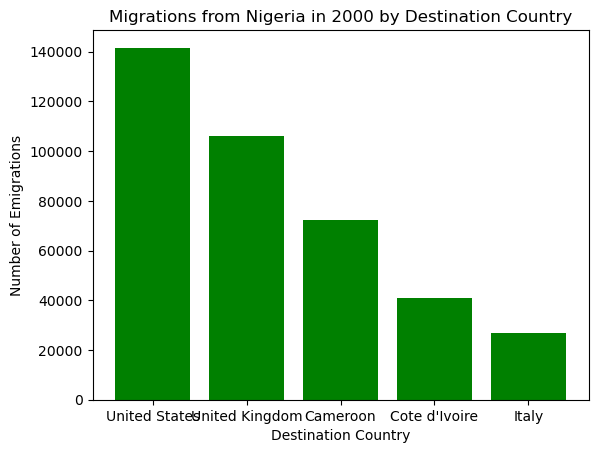

In [31]:
plt.bar(NGA_continent_emigrations['dest_country'], NGA_continent_emigrations['2000'], color='green') # first arg is for x-axis, second arg is for y-axis, we can optionally specify a color for the bars

# Add labels and title
plt.xlabel('Destination Country')
plt.ylabel('Number of Emigrations')
plt.title('Migrations from Nigeria in 2000 by Destination Country')

### Excercise

**Investigate** this phenomenon by plotting a **line graph** showing Nigeria-to-Ghana and Ghana-to-Nigeria migrations from 1960 to 2000. Then compare your results with the story in this [article](https://atavist.mg.co.za/ghana-must-go-the-ugly-history-of-africas-most-famous-bag/).

## Growth of Functions

The growth of a function refers to how its **runtime (or space) increases as the size of the input grows**. 

This growth is typically measured in terms of the input size $n$.

Understanding the growth of functions and asymptotic notation is crucial in analyzing the efficiency of algorithms and data structures.



### Example of Growth Functions:

Consider the following functions functions:
- $f(n) = 2n + 1$  - Linear, Dominant term is $n$
- $g(n) = n^2 + 3n$ - Quadratic, Dominant term is $n^2$

### Example linear dominant term

Consider three functions

- $f_1(n) = 2n + 10$
- $f_3(n) = 2n + 20$ - Same linear term, constant term doesn't matter for large n
- $f_2(n) = 5n + 1$ - Linear term is bigger, constant term is smaller


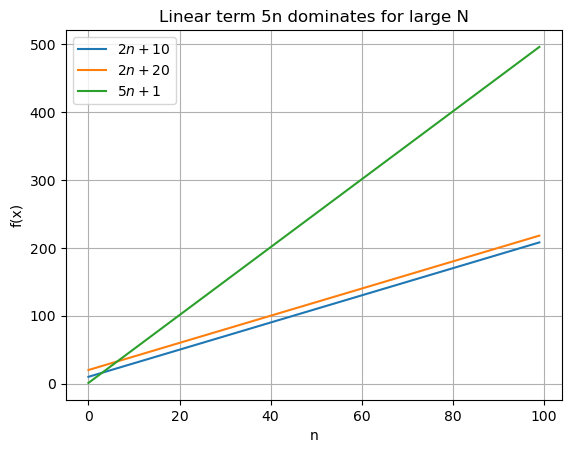

In [72]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(100)

plt.plot(n, 2*n + 10, label="$2n + 10$")
plt.plot(n, 2*n + 20, label="$2n + 20$")
plt.plot(n, 5*n + 1, label="$5n + 1$")
plt.xlabel("n")
plt.ylabel("f(x)")
plt.legend();
plt.grid()
plt.title("Linear term 5n dominates for large N");

### Asymptotic Notation

Asymptotic notation provides a formal way to describe the limiting behavior (as $n$ becomes very large) of a function:

1. **Big O Notation (O)**:
   - **Definition**: Represents the **upper bound** of the function's growth rate. It describes the worst-case scenario.
   - **Example**: Intuition is that $O(n^2)$ means the function does **not grow faster than** $n^2$.

2. **Omega Notation ($\Omega$)**:
   - **Definition**: Represents the **lower bound** of the function's growth rate. It describes the best-case scenario.
   - **Example**: Intuition is that $\Omega(n)$ means the function grows **at least as fast** as $n$.

3. **Theta Notation ($\Theta$)**:
   - **Definition**: Represents **both** the upper and lower bounds, providing a tight bound on the function's growth rate.
   - **Example**: Intuition is that $\Theta(n)$ means the function grows **exactly like $n$**.


### Big O Notation (O)

In mathematical terms, Big O notation $O(f(n))$ is used to denote an upper bound on the asymptotic growth rate of a function $f(n)$ as $n$ becomes large. Here's the mathematical definition of Big O notation:

#### Definition

Given two functions $f(n)$ and $g(n)$:

$$f(n) = O(g(n))$$

This statement means that there exist constants $c > 0$ and $n_0 \geq 0$ such that for all $n \geq n_0$, the function $f(n)$ is bounded above by $c \cdot g(n)$:

$$|f(n)| \leq c \cdot |g(n)| \quad \text{for all } n \geq n_0$$


#### Key Points

- **Upper Bound**: Big O notation provides an upper bound on the growth rate of $f(n)$ (worst case).
- **Constant Factors**: It ignores constant factors and lower-order terms, **focusing on the dominant term** that contributes most significantly to the growth rate as $n$ increases.
- **Asymptotic Behavior**: Big O notation describes the long-term behavior of functions as $n$ **approaches infinity**.

#### Example Interpretation

If $f(n) = 2n + 1$, we say $f(n) = O(n)$ because for sufficiently large $n$, $2n + 1$ is bounded above by $cn$ for some constant $c$. 

For example, choose $c = 3$ and $n_0 = 1$,

$2n + 1 \leq 3n$ holds for all $n \geq 1$.


In [75]:
for n in range(5):
    print(f"n = {n}: 2n+1 = {2*n+1} 3n = {3*n}")

n = 0: 2n+1 = 1 3n = 0
n = 1: 2n+1 = 3 3n = 3
n = 2: 2n+1 = 5 3n = 6
n = 3: 2n+1 = 7 3n = 9
n = 4: 2n+1 = 9 3n = 12


#### Practical Use

In algorithm analysis, Big O notation is widely used to characterize the time complexity (and sometimes space complexity) of algorithms. It helps in comparing the efficiency of algorithms and predicting how they will perform with larger inputs.


### Big Omega notation $\Omega(f(n))$

Big Omega notation $\Omega(f(n))$ is used to denote a lower bound on the asymptotic growth rate of a function $f(n)$ as $n$ becomes large. Here's the mathematical definition of Big Omega notation:

#### Definition

Given two functions $f(n)$ and $g(n)$:

$$f(n) = \Omega(g(n))$$

This statement means that there exist constants $c > 0$ and $n_0 \geq 0$ such that for all $n \geq n_0$, the function $f(n)$ is bounded below by $c \cdot g(n)$:

$$|f(n)| \geq c \cdot |g(n)| \quad \text{for all } n \geq n_0$$

### Key Points

- **Lower Bound**: Big Omega notation provides a lower bound on the growth rate of $f(n)$. (best case)
- **Constant Factors**: Similar to Big O notation, it ignores constant factors and lower-order terms, focusing on the dominant term that contributes most significantly to the growth rate as $n$ increases.
- **Asymptotic Behavior**: Big Omega notation describes the long-term behavior of functions as $n$ approaches infinity.


### Example Interpretation

If $f(n) = n^2 + 3n$, we say $f(n) = \Omega(n^2)$ because:

For sufficiently large $n$, $n^2 + 3n$ is bounded below by $cn^2$ for some constant $c$. 

For example, for $c = 1$ and $n_0 = 1$,

$n^2 + 3n \geq n^2$ holds for all $n \geq 1$.


In [76]:
for n in range(5):
    print(f"n = {n}: n*n + 3*n = {n*n + 3*n} 1*n*n = {n*n}")

n = 0: n*n + 3*n = 0 1*n*n = 0
n = 1: n*n + 3*n = 4 1*n*n = 1
n = 2: n*n + 3*n = 10 1*n*n = 4
n = 3: n*n + 3*n = 18 1*n*n = 9
n = 4: n*n + 3*n = 28 1*n*n = 16


### Practical Use

Big Omega notation is used similarly to Big O notation in algorithm analysis. It helps in characterizing the lower bounds of algorithms' time complexity (and sometimes space complexity), providing insight into their performance guarantees for large inputs.

### Comparison with Big O Notation

- **Big O vs. Big Omega**: While Big O provides an upper bound on the growth rate of a function $f(n)$, Big Omega provides a lower bound. Together, they can give a more complete picture of an algorithm's complexity by indicating both its **worst-case** and **best-case** scenarios.


### Big Theta notation $\Theta(f(n))$

In mathematical terms, Big Theta notation $\Theta(f(n))$ is used to denote a tight bound on the asymptotic growth rate of a function $f(n)$ as $n$ becomes large. Here's the mathematical definition of Big Theta notation:

### Definition

Given two functions $f(n)$ and $g(n)$:

$$f(n) = \Theta(g(n))$$

This statement means that there exist constants $c_1 > 0$, $c_2 > 0$, and $n_0 \geq 0$ such that for all $n \geq n_0$, the function $f(n)$ is bounded both above and below by $c_1 \cdot g(n)$ and $c_2 \cdot g(n)$, respectively:

$$c_1 \cdot |g(n)| \leq |f(n)| \leq c_2 \cdot |g(n)| \quad \text{for all } n \geq n_0$$

- $|f(n)| \geq c_1 \cdot |g(n)|$
- $|f(n)| \leq c_2 \cdot |g(n)|$


#### Key Points

- **Tight Bound**: Big Theta notation provides a tight or asymptotically tight bound on the growth rate of $f(n)$. It means $f(n)$ grows at the same rate as $g(n)$ within constant factors, asymptotically speaking.
  
- **Constant Factors**: Similar to Big O and Big Omega notations, Big Theta ignores constant factors and lower-order terms, focusing on the dominant term that contributes most significantly to the growth rate as $n$ increases.
  
- **Asymptotic Behavior**: Big Theta notation describes the long-term behavior of functions as $n$ approaches infinity, indicating that $f(n)$ and $g(n)$ grow at the same rate.

#### Example Interpretation

If $f(n) = n^2 + 3n$, and $g(n) = n^2$, we say $f(n) = \Theta(n^2)$ because there exist
- constant $c_1 = 1$ and $n_0 = 1$ such that
    - $n^2 \leq n^2 + 3n \leq n^2$ holds for all $n \geq 1$.
- constant $c_2 = 0.5$ such that
    - $  n^2 + 3n \leq n^2$ 

In [94]:
print("n    0.5*n*n  n*n  n*n+3*n")
for n in range(5):
    print(f"{n}     {0.5*n*n:3g}     {n*n:2d}     {n*n + 3*n:2d}")

n    0.5*n*n  n*n  n*n+3*n
0       0      0      0
1     0.5      1      4
2       2      4     10
3     4.5      9     18
4       8     16     28


#### Practical Use

Big Theta notation is particularly useful in algorithm analysis as it provides a precise description of an algorithm's asymptotic behavior. It indicates both the upper and lower bounds of the growth rate of algorithms' time complexity (and sometimes space complexity), giving a clear understanding of their efficiency across different input sizes.

#### Comparison with Big O and Big Omega Notations

- **Big O vs. Big Omega vs. Big Theta**: 
  - Big O provides an upper bound on the growth rate of $f(n)$.
  - Big Omega provides a lower bound on the growth rate of $f(n)$.
  - Big Theta provides both upper and lower bounds, indicating that $f(n)$ grows asymptotically at the same rate as $g(n)$.

In mathematical analysis, small o $o(f(n))$ and small omega $\omega(f(n))$ notations are used to describe the asymptotic behavior of functions in terms of limits. Here’s how they are defined using limits:


### Small o Notation $o(f(n))$

Small o notation $o(f(n))$ denotes that a function $g(n)$ grows asymptotically slower than $f(n)$ as $n$ approaches infinity.

#### Definition:

$$g(n) = o(f(n)) \quad \text{if and only if} \quad \lim_{n \to \infty} \frac{g(n)}{f(n)} = 0$$

In simpler terms, $g(n)$ is in $o(f(n))$ if for every positive constant $c > 0$, there exists a constant $n_0 \geq 0$ such that for all $n \geq n_0$, $|g(n)| < c \cdot |f(n)|$.

### Small Omega Notation $\omega(f(n))$

Small omega notation $\omega(f(n))$ denotes that a function $g(n)$ grows asymptotically faster than $f(n)$ as $n$ approaches infinity.

#### Definition:

$$g(n) = \omega(f(n)) \quad \text{if and only if} \quad \lim_{n \to \infty} \frac{g(n)}{f(n)} = \infty$$

In other words, $g(n)$ is in $\omega(f(n))$ if for every positive constant $c > 0$, there exists a constant $n_0 \geq 0$ such that for all $n \geq n_0$, $|g(n)| > c \cdot |f(n)|$.

### Key Points:

- **Asymptotic Behavior**: Small o notation $o(f(n))$ indicates that $g(n)$ grows slower than $f(n)$ as $n$ becomes large, while small omega $\omega(f(n))$ indicates that $g(n)$ grows faster than $f(n)$.
  
- **Limits**: Both notations are defined using limits to formalize the concept of growth rate in asymptotic analysis.
  
- **Precision**: These notations provide a more precise characterization of asymptotic relationships compared to Big O and Big Omega, especially in contexts where exact growth rates are important.


Exercises for Asymptotic Notation Section
-----------------------------------------

### Exercise 1: Identifying Notations

For each pair of functions $f(n)$ and $g(n)$, determine whether $f(n)$ is in Big O, Small o, Big Theta, Small omega, or Big Omega relative to $g(n)$.

1. $f(n) = 2n + 1$, $g(n) = n$
2. $f(n) = n^2$, $g(n) = 3n^2$
3. $f(n) = \log n$, $g(n) = \sqrt{n}$
4. $f(n) = n^{0.5}$, $g(n) = n^{0.4}$
5. $f(n) = n \log n$, $g(n) = n$

### Exercise 2: Verifying Limits

Determine whether the following statements are true (T) or false (F):

1. $n^2 = O(n^3)$
2. $n^2 = o(n^3)$
3. $n^2 = \Theta(n^2)$
4. $n^2 = \omega(n)$
5. $n^2 = \Omega(n^2)$

### Exercise 3: Matching Functions

Match each function $f(n)$ with the appropriate notation (Big O, Small o, Big Theta, Small omega, Big Omega) describing its asymptotic behavior:

1. $f(n) = n^2$
2. $f(n) = \log n$
3. $f(n) = 3n + 5$
4. $f(n) = n^{0.5}$
5. $f(n) = 2^n$